In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
!pip install mlxtend

In [7]:
book = pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [8]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [10]:
book.shape

(2000, 11)

In [8]:
for i in book.columns:
    print(i)
    print(book[i].value_counts())
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



# Pre-Processing

In [11]:
df=pd.get_dummies(book)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Apriori Algorithm with different values for support and confidence

In [17]:
frequent_itemsets10_70 = apriori(book, min_support=0.1, use_colnames=True)
frequent_itemsets10_70

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [19]:
# 10% Support and 70% confidence

rules10_70 = association_rules(frequent_itemsets10_70, metric='lift', min_threshold=0.7)


In [20]:
# Lift Ratio > 1 is a good association rule

rules10_70[rules10_70.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [ ]:
# visualization

Text(0.5, 0.98, 'rules [10, 70]')

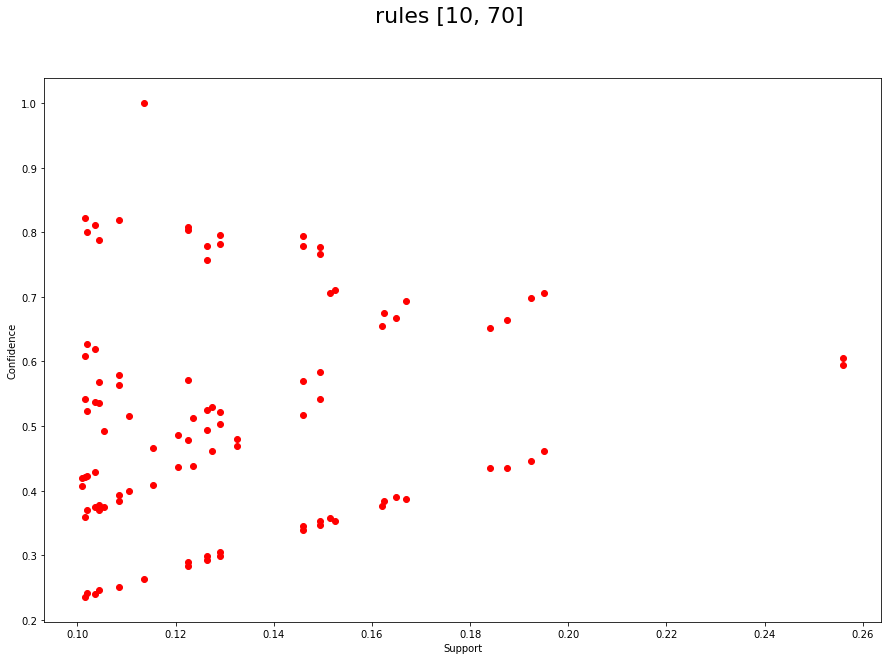

In [44]:
plt.figure(figsize=(15,10))
plt.scatter(rules10_70['support'], rules10_70['confidence'],color="red")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('rules [10, 70]', size=22)

In [51]:
# 10% Support and 55% confidence

frequent_itemsets10_55 = apriori(book, min_support=0.1, use_colnames=True)
frequent_itemsets10_55

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [52]:
rules10_55 = association_rules(frequent_itemsets10_55, metric='lift', min_threshold=0.55)

# Lift Ratio > 1 is a good association rule

rules10_55[rules10_55.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


Text(0.5, 0.98, 'rules [10, 55]')

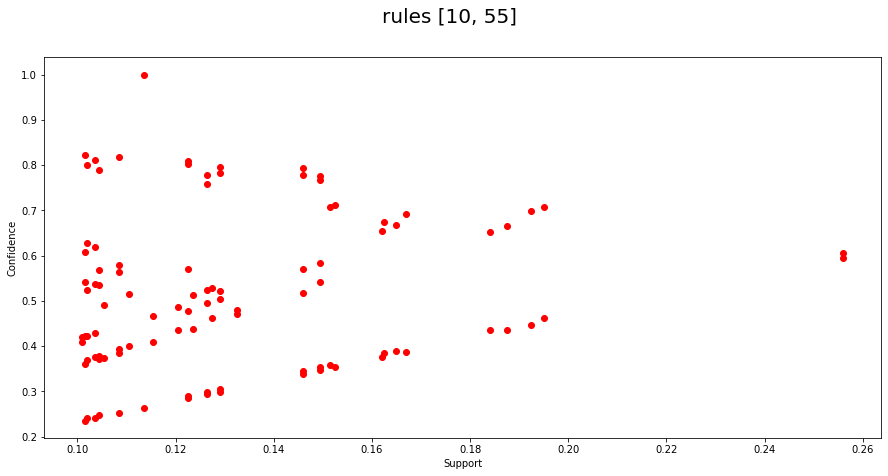

In [53]:
#visualization
plt.figure(figsize=(15,7))
plt.scatter(rules10_55['support'], rules10_55['confidence'],color="red")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('rules [10, 55]', size=20)

# change in K-Itemset/minimum length in apriori algorithm

In [55]:
# 10% Support and 50% confidence
# K itemset is 2

frequent_itemsets10_50 = apriori(book, min_support=0.1, use_colnames=True, max_len=2)
frequent_itemsets10_50

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [56]:
rules10_50 = association_rules(frequent_itemsets10_50, metric='lift', min_threshold=0.5)

# Lift Ratio > 1 is a good association rule
rules10_50[rules10_50.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
39,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
38,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667
37,(RefBks),(GeogBks),0.2145,0.2760,0.1105,0.515152,1.866491,0.051298,1.493250
36,(GeogBks),(RefBks),0.2760,0.2145,0.1105,0.400362,1.866491,0.051298,1.309958
33,(ArtBks),(DoItYBks),0.2410,0.2820,0.1235,0.512448,1.817192,0.055538,1.472664
32,(DoItYBks),(ArtBks),0.2820,0.2410,0.1235,0.437943,1.817192,0.055538,1.350397
19,(YouthBks),(GeogBks),0.2475,0.2760,0.1205,0.486869,1.764017,0.052190,1.410945
18,(GeogBks),(YouthBks),0.2760,0.2475,0.1205,0.436594,1.764017,0.052190,1.335627
